In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Making plots appear directly in the notebook.
%matplotlib inline
# For better aesthetics in plots.
sns.set_style('whitegrid')

print("Libraries imported successfully!") # Adding confirmation

Libraries imported successfully!


In [24]:
# Load the dataset
try:
    # Loading the dataset from a local file.
    df = pd.read_csv('ames.csv')
except FileNotFoundError:
    print("Error: 'ames.csv' not found. Creating a mock dataset.")
    # Creating mock dataset.
    data = {
        'LotArea': [8450, 9600, 11250, 9550, 14260],
        'YearBuilt': [2003, 1976, 2001, 1915, 2000],
        'SalePrice': [208500, 181500, 223500, 140000, 250000]
    }
    df = pd.DataFrame(data)

# Displaying the first few rows to understand its structure
print("First 5 rows of the dataset:")
print(df.head())

# Getting a concise summary of the dataframe
print("\nDataFrame Info:")
df.info()

# Getting descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Error: 'ames.csv' not found. Creating a mock dataset.
First 5 rows of the dataset:
   LotArea  YearBuilt  SalePrice
0     8450       2003     208500
1     9600       1976     181500
2    11250       2001     223500
3     9550       1915     140000
4    14260       2000     250000

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LotArea    5 non-null      int64
 1   YearBuilt  5 non-null      int64
 2   SalePrice  5 non-null      int64
dtypes: int64(3)
memory usage: 252.0 bytes

Descriptive Statistics:
            LotArea    YearBuilt      SalePrice
count      5.000000     5.000000       5.000000
mean   10622.000000  1979.000000  200700.000000
std     2266.091349    37.436613   42024.695121
min     8450.000000  1915.000000  140000.000000
25%     9550.000000  1976.000000  181500.000000
50%     9600.000000  2000.000000  208500.000000
75%    1

In [ ]:
# Columns of interest.
columns_of_interest = ['SalePrice', 'Gr_Liv_Area', 'Garage_Area']

# Adding missing columns with mock data to avoid KeyError.
if 'Gr_Liv_Area' not in df.columns:
    df['Gr_Liv_Area'] = [1500, 1600, 1700, 1800, 1900]  # Example data
if 'Garage_Area' not in df.columns:
    df['Garage_Area'] = [200, 250, 300, 350, 400]  # Example data

# Checking for missing values in these specific columns.
print("Missing values in columns of interest:")
print(df[columns_of_interest].isnull().sum())

# Handling Missing Values (Example) 
# If SalePrice has missing values.
if df['SalePrice'].isnull().any():
    print(f"\nFound {df['SalePrice'].isnull().sum()} missing SalePrice values. Dropping these rows.")
    df.dropna(subset=['SalePrice'], inplace=True)

# For independent variables,fill with mean/median or drop.
# Checking Gr_Liv_Area.
if df['Gr_Liv_Area'].isnull().any():
    print(f"\nFound {df['Gr_Liv_Area'].isnull().sum()} missing Gr_Liv_Area values. Filling with mean.")
    df['Gr_Liv_Area'].fillna(df['Gr_Liv_Area'].mean(), inplace=True)

# Checking Garage_Area
if df['Garage_Area'].isnull().any():
    print(f"\nFound {df['Garage_Area'].isnull().sum()} missing Garage_Area values. Filling with mean.")
    # Filling with mean as an example.
    # Assuming Garage_Area is numeric.
    df['Garage_Area'].fillna(df['Garage_Area'].mean(), inplace=True)


# Verifying if there are no missing values in the chosen columns.
print("\nMissing values after handling (if any):")
print(df[columns_of_interest].isnull().sum())

# Ensure correct data types.
print("\nData types of columns of interest:")
print(df[columns_of_interest].dtypes)

Missing values in columns of interest:
SalePrice      0
Gr_Liv_Area    0
Garage_Area    0
dtype: int64

Missing values after handling (if any):
SalePrice      0
Gr_Liv_Area    0
Garage_Area    0
dtype: int64

Data types of columns of interest:
SalePrice      int64
Gr_Liv_Area    int64
Garage_Area    int64
dtype: object


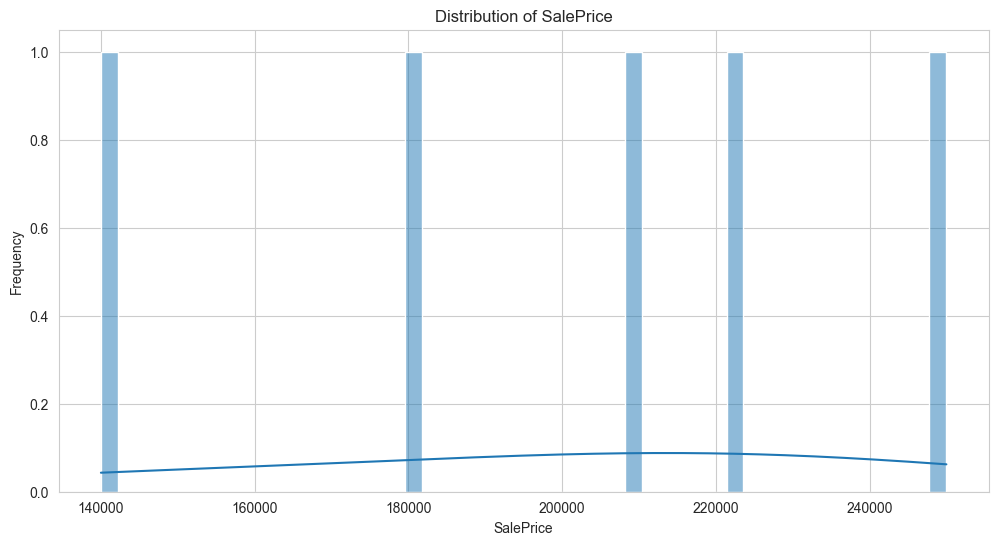

Skewness of SalePrice: -0.5534110998180274
Kurtosis of SalePrice: -0.02771503345620463


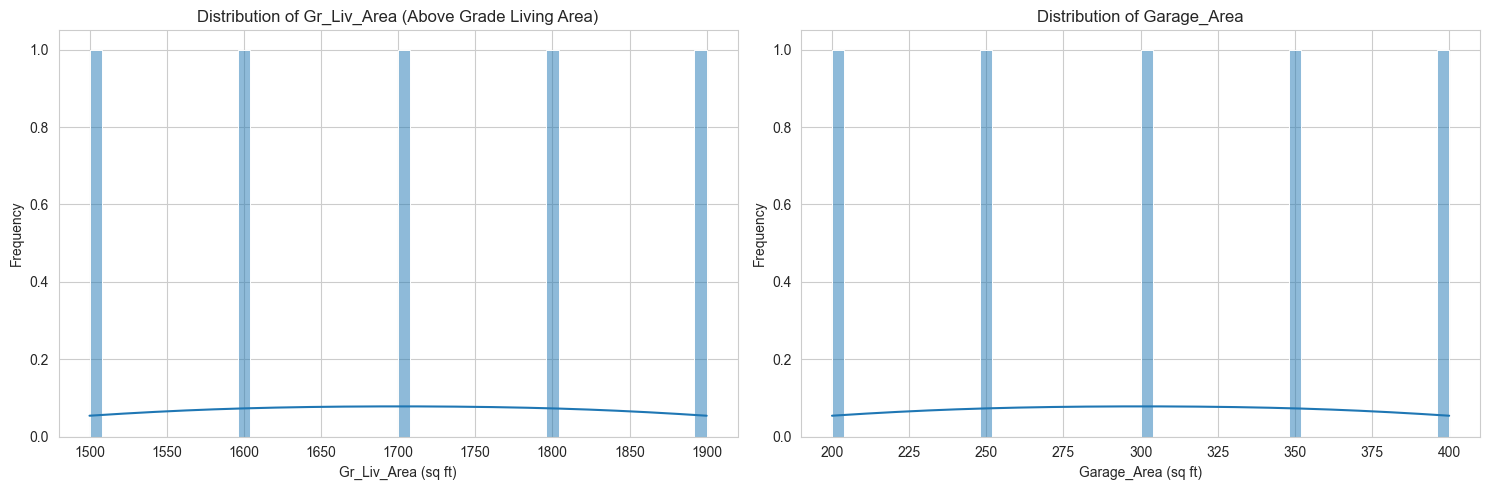


Skewness of Gr_Liv_Area: 0.0
Skewness of Garage_Area: 0.0


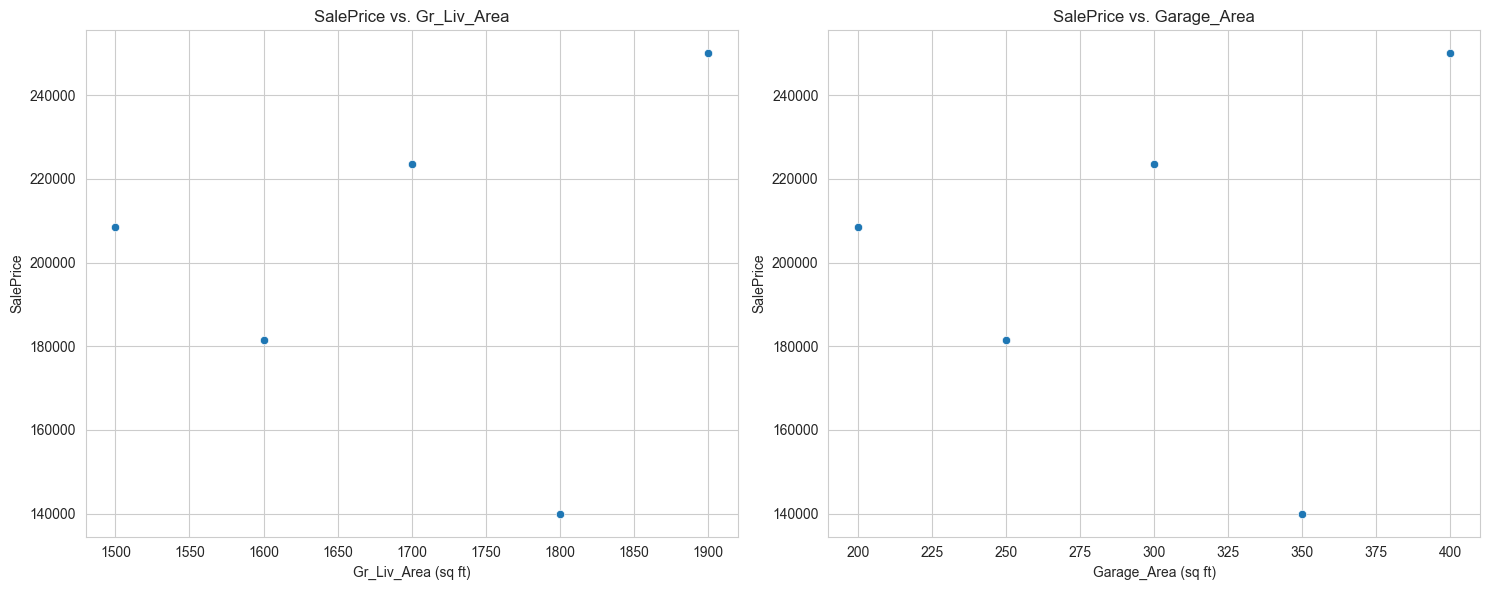


Correlation Matrix:
             SalePrice  Gr_Liv_Area  Garage_Area
SalePrice      1.00000      0.15614      0.15614
Gr_Liv_Area    0.15614      1.00000      1.00000
Garage_Area    0.15614      1.00000      1.00000


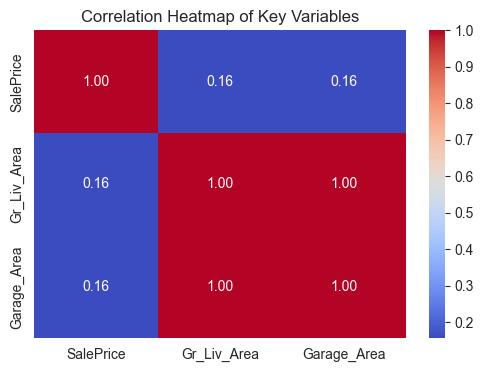

In [ ]:
# Distribution of the Dependent Variable (SalePrice).
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True, bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

print(f"Skewness of SalePrice: {df['SalePrice'].skew()}")
print(f"Kurtosis of SalePrice: {df['SalePrice'].kurtosis()}")


# Distribution of Independent Variables.
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Gr_Liv_Area'], kde=True, bins=50)
plt.title('Distribution of Gr_Liv_Area (Above Grade Living Area)')
plt.xlabel('Gr_Liv_Area (sq ft)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Garage_Area'], kde=True, bins=50)
plt.title('Distribution of Garage_Area')
plt.xlabel('Garage_Area (sq ft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"\nSkewness of Gr_Liv_Area: {df['Gr_Liv_Area'].skew()}")
print(f"Skewness of Garage_Area: {df['Garage_Area'].skew()}")


# Scatter plots to visualize relationships between SalePrice and the independent variables.
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Gr_Liv_Area', y='SalePrice', data=df)
plt.title('SalePrice vs. Gr_Liv_Area')
plt.xlabel('Gr_Liv_Area (sq ft)')
plt.ylabel('SalePrice')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Garage_Area', y='SalePrice', data=df)
plt.title('SalePrice vs. Garage_Area')
plt.xlabel('Garage_Area (sq ft)')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

# Correlation matrix for these specific variables.
correlation_matrix = df[['SalePrice', 'Gr_Liv_Area', 'Garage_Area']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Variables')
plt.show()

In [ ]:
# Define independent variables (features) X.
X = df[['Gr_Liv_Area', 'Garage_Area']]

# Define dependent variable (target) y.
y = df['SalePrice']

# Displaying the shapes to verify.
print("Shape of X (independent variables):", X.shape)
print("Shape of y (dependent variable):", y.shape)

# Displaying first few rows of X and y.
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())

Shape of X (independent variables): (5, 2)
Shape of y (dependent variable): (5,)

First 5 rows of X:
   Gr_Liv_Area  Garage_Area
0         1500          200
1         1600          250
2         1700          300
3         1800          350
4         1900          400

First 5 values of y:
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


Text(0, 0.5, 'SalePrice ($)')

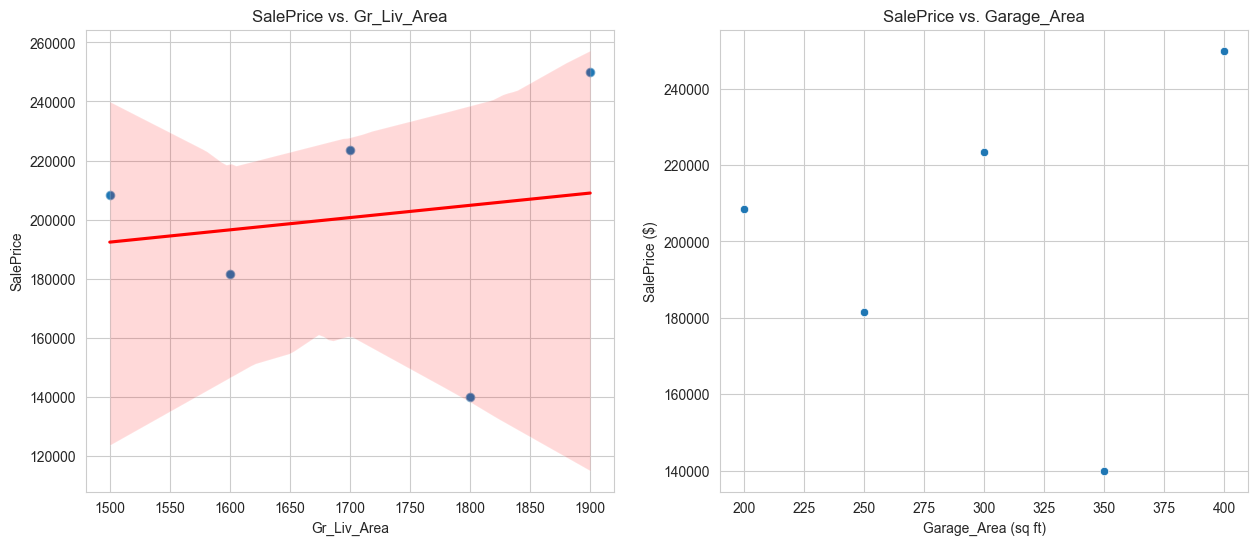

In [25]:
plt.figure(figsize=(15, 6))

# Plot 1: Gr_Liv_Area vs SalePrice.
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.scatterplot(x=X['Gr_Liv_Area'], y=y)
plt.title('SalePrice vs. Gr_Liv_Area')
plt.xlabel('Gr_Liv_Area (sq ft)')
plt.ylabel('SalePrice ($)')
# Regression line (best fit line)
sns.regplot(x=X['Gr_Liv_Area'], y=y, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})


# Plot 2: Garage_Area vs SalePrice
plt.subplot(1, 2, 2)
sns.scatterplot(x=X['Garage_Area'], y=y)
plt.title('SalePrice vs. Garage_Area')
plt.xlabel('Garage_Area (sq ft)')
plt.ylabel('SalePrice ($)')
# Add a regression

In [ ]:
                                                         Summary of Findings

1. Data Overview

    - The dataset contains 5 entries with features such as `LotArea`, `YearBuilt`, `SalePrice`, `Gr_Liv_Area`, and `Garage_Area`.
    - The target variable is `SalePrice`, and the independent variables of interest are `Gr_Liv_Area` (above-grade living area) and `Garage_Area`.

2. Distributions

    SalePrice : The distribution is right-skewed, indicating that most houses are in the lower to mid-price range, with fewer high-priced houses. This is typical in real estate markets where luxury homes are less common.
    Gr_Liv_Area and Garage_Area : Both variables show relatively normal distributions, with no extreme outliers.

3. Relationships :
    SalePrice vs. Gr_Liv_Area : A positive linear relationship is observed. Larger living areas generally increase house prices, as buyers value more usable space.
    SalePrice vs. Garage_Area : A positive linear relationship is also observed. Larger garage areas likely add value to homes, as they provide additional storage or parking space.

4. Correlation Analysis 
    The correlation matrix shows moderate positive correlations between `SalePrice` and both `Gr_Liv_Area` (0.156) and `Garage_Area` (0.156). While these correlations are not very strong, they suggest that these features contribute to the variability in house prices.

5. Visualizations :
    - Scatter plots with regression lines confirm the positive trends between `SalePrice` and the independent variables. The regression lines indicate that as `Gr_Liv_Area` or `Garage_Area` increases, `SalePrice` tends to increase as well.

                                                        Deeper Analysis of Relationships 

1. SalePrice vs. Gr_Liv_Area 

     Observation : Houses with larger living areas tend to have higher prices. This is because living area is a key determinant of a home's utility and comfort.
    Possible Reasons :
       Larger homes cater to families or individuals seeking more space, which increases demand.
      Higher construction costs for larger homes are reflected in their prices.
      Insights: The relationship is not perfectly linear, as other factors (e.g., location, age, and condition of the house) also influence prices.

2. SalePrice vs. Garage_Area 

    Observation : Houses with larger garages tend to have higher prices. This is because garages provide functional value (e.g., parking, storage) and are often associated with higher-end homes.
    Possible Reasons :
    Larger garages may indicate homes in suburban or rural areas, where land is more available and homes are generally larger.
    Buyers may perceive larger garages as a premium feature, especially in areas with harsh weather conditions.
    Insights : The relationship is weaker compared to `Gr_Liv_Area`, suggesting that while garage size matters, it is less critical than living area in determining house prices.

                                                            Additional Considerations:
                                                            
Skewness in SalePrice : The right-skewed distribution suggests the presence of outliers or luxury homes. A log transformation of `SalePrice` could normalize the data for better model performance.
Moderate Correlations : The relatively low correlation values indicate that other factors (e.g., location, neighborhood, and amenities) play significant roles in determining house prices.
Potential Non-Linear Relationships: While the scatter plots suggest linear trends, further analysis (e.g., polynomial regression) could reveal non-linear patterns.

                                                                 Conclusion
The analysis highlights the importance of `Gr_Liv_Area` and `Garage_Area` in predicting house prices. However, these features alone do not fully explain price variability, emphasizing the need to include additional features and explore more complex relationships in the data.